In [3]:
import os
from pathlib import Path
from tqdm import tqdm
from bs4 import BeautifulSoup
from bs4.element import Comment
import tldextract

def tag_visible(element):
    '''
    Helper function for populate_all_text()
    
    Takes bs4 element as input and returns boolean indicating whetehr the element is or isn't
    visible text
    '''
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def create_dir(target_directory):
    '''Creates directory target_directory if the directory doesn't already exist'''
    if not os.path.isdir(str(target_directory)):
        os.mkdir(target_directory)

def scrape_hyperlinks(source_dir):
    '''
    Populates target dir with .txt files of scraped tags from source dir
    Each .txt file contains all visible text

    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ARGUMENTS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
    - source_dir
        - source of HTML files, should be raw_sources/<real or fake>/html
    '''
    i = 0
    for dir_ in tqdm([source_dir + '\\' + s for s in os.listdir(source_dir)]):
        files = [dir_ + '\\' + s for s in os.listdir(dir_)]
        for html in files:
            # Open HTML
            with open(html, encoding='utf8') as f:
                soup = BeautifulSoup(f, 'html.parser')
            f.close()
            
            links = []
            for link in soup.findAll('a', href=True):
                links.append(link['href'])
            break
        i += 1
        if i > 1:
            break
    return links

source_dir = Path.cwd().parent / 'content_analysis' / 'raw_sources' / 'real_html' / 'sources'
links = scrape_hyperlinks(str(source_dir))

not_self_referential = []
for link in links:
    result = tldextract.extract(link)
    print(result.domain)

# print(not_self_referential)

  0%|          | 1/500 [00:00<03:03,  2.71it/s]


wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
sponsorwfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
sponsorwfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
charlottepodcastfestival
wfae
wfae
wfae
wfae
wfae
wfae
charlottepodcastfestival
wfae
wfae
wfae
wfae

wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae
wfae

## First, combine the real and fake dataframes into a single dataframe

In [4]:
import pickle
import pandas as pd
import collections

# Prepare concatenated dataframe
with open('500_real_df.pkl', 'rb') as f:
    real_df = pickle.load(f)
f.close()

with open('500_fake_df.pkl', 'rb') as f:
    fake_df = pickle.load(f)
f.close()

real_df['label'] = 'real'
fake_df['label'] = 'fake'

df = pd.concat([real_df, fake_df])
df.drop(columns=['num_links', 'link_dict'], inplace=True)
df.reset_index(inplace=True)

df['domain'] = df.apply(lambda row: 
                        tldextract.extract(row.site).subdomain + '.' +
                        tldextract.extract(row.site).domain + '.' +
                        tldextract.extract(row.site).suffix, axis=1)

# Check for duplicates
print([item for item, count in collections.Counter(df['domain'].tolist()).items() if count > 1])

# Delete duplicates
df = df.drop(axis=0, index=489)  # theguardian is present twice
dropped_rows = [489]
df.reset_index(inplace=True)
df.drop(columns=['level_0'], axis=1, inplace=True)

domain_dict = dict(zip(df.domain, df.index))


['.theguardian.com']


In [5]:
print(df[df['index']==489])

     index              site label      domain
988    489  http://mcmnt.com  fake  .mcmnt.com


## Create a numpy matrix of size (num_sites, num_sites)
If there is a link from site i to site j, then matrix[i,j] = 1

In [34]:
import numpy as np
connections = np.zeros(shape=(len(domain_dict), len(domain_dict)))

## Loop through the html of the sites, finding domains along the way
Using a dictionary where keys = domains and values = indices, populate the numpy matrix

100%|██████████| 499/499 [2:39:54<00:00, 19.23s/it]


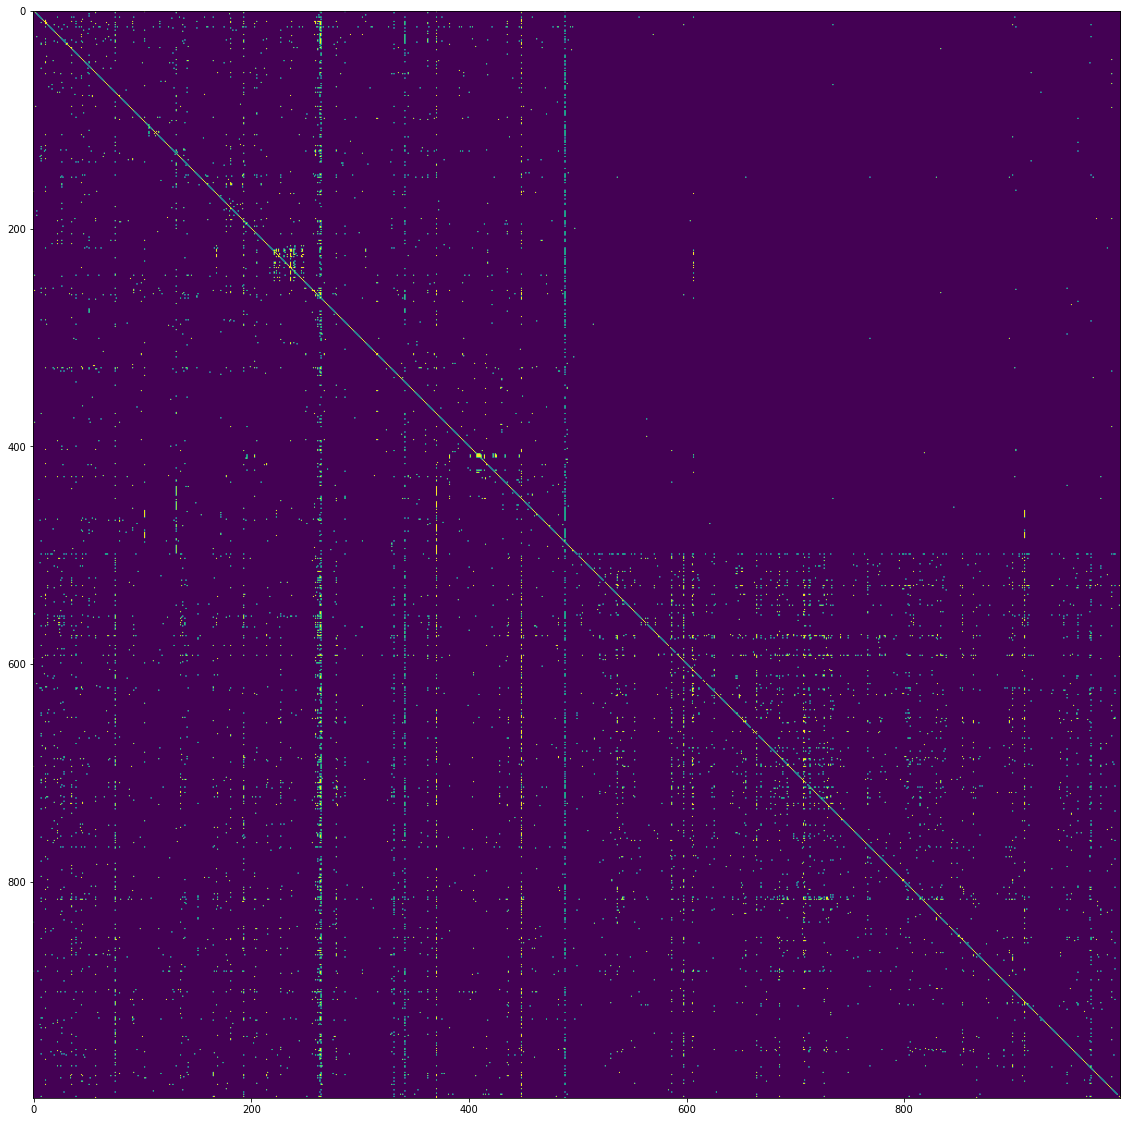

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def scrape_hyperlink_connections(real_dir, fake_dir, domain_df, domain_dict):
    '''
    Parses through the html in source dir, scraping outward referring links along the way.
    Returns a numpy matrix, connections, with link from site i to site j indicated by
    connections[i,j] = 1.

    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ARGUMENTS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
    - source_dir
        - source of HTML files, should be raw_sources/<real or fake>/html
    - domain_dict
        - dictionary of domain, index pairs
    '''
    connections = np.zeros(shape=(len(domain_dict), len(domain_dict)))
    i = 0
    # for source_dir in [real_dir, fake_dir]:
    for source_dir in [fake_dir]:
        if source_dir == real_dir:
            current_dir = 'real'
        else:
            current_dir = 'fake'
        for dir_ in tqdm([source_dir / s for s in os.listdir(source_dir)]):
            dropped_rows = [489]
            dropped_dirs = ['real']
            if (int(dir_.name) in dropped_rows):
                if (dropped_dirs[dropped_rows.index(int(dir_.name))] == current_dir): # If row has been dropped, continue
                    continue
            # Get index of domain to access while populating connections
            if source_dir == real_dir:
                row = domain_df.loc[(domain_df['label'] == 'real')].loc[(domain_df['index']) == int(dir_.name)]
            else:
                row = domain_df.loc[(domain_df['label'] == 'fake')].loc[(domain_df['index']) == int(dir_.name)]
            domain_idx = row.domain.index.values[0]
            files = [dir_ / s for s in os.listdir(dir_)]
            links = []

            # Get links from files
            for html in files:
                # Open HTML
                with open(html, encoding='utf8') as f:
                    soup = BeautifulSoup(f, 'html.parser')
                f.close()
                
                for link in soup.findAll('a', href=True):
                    links.append(link['href'])
            
            # Distill links down to domains
            links = list(set(links))
            domains = [
                        tldextract.extract(l).subdomain + '.' +
                        tldextract.extract(l).domain + '.' +
                        tldextract.extract(l).suffix for l in links
            ]
            domains = list(set(domains))
            filtered_domains = []
            for d in domains:
                if 'www' in d:
                    filtered_domains.append(d.replace('www', ''))
                else:
                    filtered_domains.append(d)

            # Populate connections
            for d in filtered_domains:
                if d in domain_dict.keys():
                    connections[domain_idx, domain_dict[d]] = 1
    
    return connections

real_dir = Path.cwd().parent / 'content_analysis' / 'raw_sources' / 'real_html' / 'sources'
fake_dir = Path.cwd().parent / 'content_analysis' / 'raw_sources' / 'fake_html' / 'sources'
connections_2 = scrape_hyperlink_connections(real_dir, fake_dir, df, domain_dict)  # Accidentally had break statement in loop, never went to fake dir

plt.figure(figsize = (20,20))
plt.imshow(connections+connections_2)

In [26]:
full_connections = connections + connections_2

In [27]:
# Save relevant data
with open('connections.pkl', 'wb') as f:
    pickle.dump(full_connections, f)
f.close()
with open('domain_df.pkl', 'wb') as f:
    pickle.dump(df, f)
f.close()
with open('domain_dict.pkl', 'wb') as f:
    pickle.dump(domain_dict, f)
f.close()

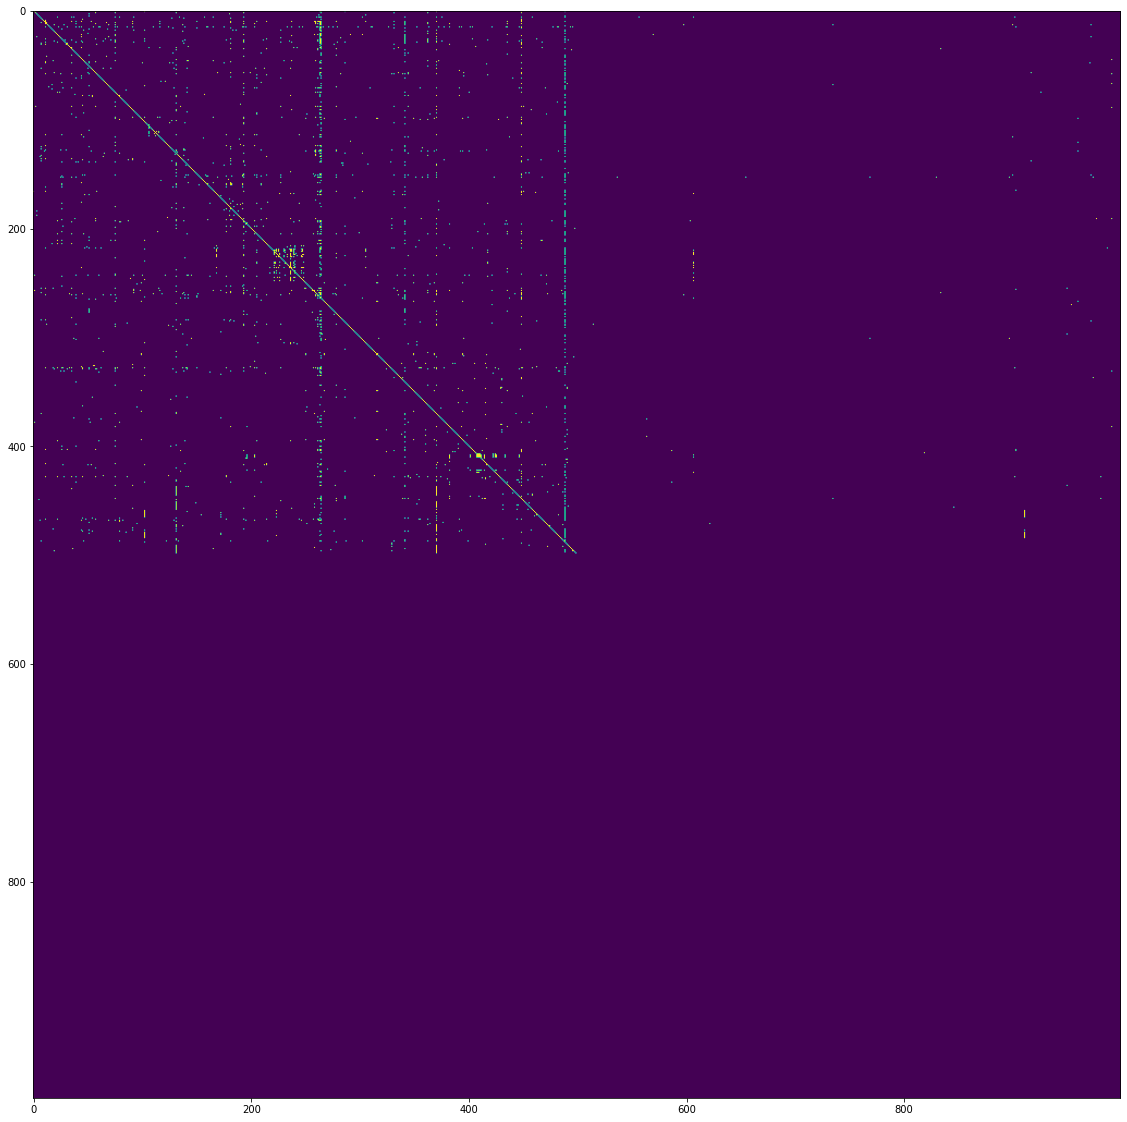

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(connections)

## Use the matrix to construct a graph